# Датасет

In [ ]:
!python --version

Python 3.12.12


In [ ]:
!pip list

Package                                  Version
---------------------------------------- --------------------
absl-py                                  1.4.0
absolufy-imports                         0.3.1
accelerate                               1.11.0
aiofiles                                 24.1.0
aiohappyeyeballs                         2.6.1
aiohttp                                  3.13.2
aiosignal                                1.4.0
alabaster                                1.0.0
albucore                                 0.0.24
albumentations                           2.0.8
ale-py                                   0.11.2
alembic                                  1.17.1
altair                                   5.5.0
annotated-doc                            0.0.4
annotated-types                          0.7.0
antlr4-python3-runtime                   4.9.3
anyio                                    4.11.0
anywidget                                0.9.19
argon2-cffi                        

In [ ]:
!pip install datasets pandas langdetect tqdm seaborn matplotlib scikit-learn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from datasets import load_dataset, get_dataset_config_names
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect
from tqdm import tqdm
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

Доступные сабсеты: ['jailbreak_2023_05_07', 'jailbreak_2023_12_25', 'regular_2023_05_07', 'regular_2023_12_25']


jailbreak_2023_12_25/train-00000-of-0000(…):   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1405 [00:00<?, ? examples/s]

regular_2023_12_25/train-00000-of-00001.(…):   0%|          | 0.00/12.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13735 [00:00<?, ? examples/s]

Размер объединённого датасета: (15140, 9)
Колонки: ['platform', 'source', 'prompt', 'jailbreak', 'created_at', 'date', 'community', 'community_id', 'previous_community_id']
Пропуски по колонкам:
 platform                     0
source                       0
prompt                       0
jailbreak                    0
created_at                 218
date                       218
community                14734
community_id             14393
previous_community_id    14749
dtype: int64 

Распределение классов:
jailbreak
0    0.907199
1    0.092801
Name: proportion, dtype: float64 

Дубликаты: 144
Пустые строки в prompt: 0
count    15140.000000
mean       278.851982
std        434.297291
min          1.000000
25%         61.000000
50%        145.000000
75%        337.000000
max      12949.000000
Name: prompt_len_words, dtype: float64


100%|██████████| 15140/15140 [01:54<00:00, 132.51it/s]


Топ языков:
language
en       14454
pt         106
zh-cn       94
es          88
id          78
fr          78
de          34
nl          29
vi          22
ko          18
Name: count, dtype: int64


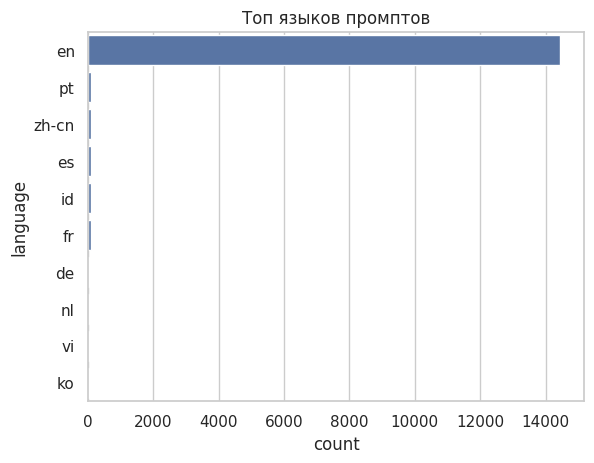

До очистки: (15140, 11)
После очистки: (13194, 11)
Train: 9235, Val: 1979, Test: 1980

Баланс по классам:
train:
jailbreak
0    0.905143
1    0.094857
Name: proportion, dtype: float64

val:
jailbreak
0    0.905508
1    0.094492
Name: proportion, dtype: float64

test:
jailbreak
0    0.905051
1    0.094949
Name: proportion, dtype: float64



In [ ]:
from datasets import load_dataset, get_dataset_config_names
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect
from tqdm import tqdm
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
# Проверим доступные сабсеты
configs = get_dataset_config_names("TrustAIRLab/in-the-wild-jailbreak-prompts")
print("Доступные сабсеты:", configs)

# Загружаем jailbreak и regular наборы
ds_jb = load_dataset("TrustAIRLab/in-the-wild-jailbreak-prompts", "jailbreak_2023_12_25", split="train")
ds_reg = load_dataset("TrustAIRLab/in-the-wild-jailbreak-prompts", "regular_2023_12_25", split="train")

# Объединяем и добавляем метку
df_jb = ds_jb.to_pandas()
df_jb['jailbreak'] = 1

df_reg = ds_reg.to_pandas()
df_reg['jailbreak'] = 0

df = pd.concat([df_jb, df_reg], ignore_index=True)
print(f"Размер объединённого датасета: {df.shape}")
print("Колонки:", df.columns.tolist())

# Проверим пропуски, баланс классов и дубликаты
print("Пропуски по колонкам:\n", df.isna().sum(), "\n")

print("Распределение классов:")
print(df['jailbreak'].value_counts(normalize=True).rename('proportion'), "\n")

print("Дубликаты:", df.duplicated().sum())
print("Пустые строки в prompt:", (df['prompt'].astype(str).str.strip() == '').sum())

# Длина промптов
df['prompt_len_words'] = df['prompt'].astype(str).apply(lambda x: len(x.split()))
print(df['prompt_len_words'].describe())

tqdm.pandas()

def detect_lang_safe(x):
    try:
        return detect(str(x))
    except:
        return "unknown"

df['language'] = df['prompt'].progress_apply(detect_lang_safe)

print("Топ языков:")
print(df['language'].value_counts().head(10))

sns.countplot(y='language', data=df, order=df['language'].value_counts().index[:10])
plt.title("Топ языков промптов")
plt.show()

print("До очистки:", df.shape)
df = df.drop_duplicates(subset=['prompt'])
df = df[df['prompt_len_words'] > 5]
df = df[df['prompt_len_words'] < 1000]
df = df[df['language'] == 'en']
print("После очистки:", df.shape)

train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['jailbreak'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['jailbreak'], random_state=42)

print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")
print("\nБаланс по классам:")
for name, subset in zip(['train', 'val', 'test'], [train_df, val_df, test_df]):
    print(f"{name}:\n{subset['jailbreak'].value_counts(normalize=True)}\n")


# LLM-детектор

 Метод  F1-Score   Recall  Precision  Accuracy

LLM (Few-shot Mistral 8x22B)  0.331878 0.940594   0.201485  0.631325

 precision    recall  f1-score   support

      Normal       0.97      0.92      0.95      2498
   Jailbreak       0.51      0.77      0.61       268

    accuracy                           0.91      2766

# RAG детектор

In [ ]:
import os
import numpy as np

from google.colab import userdata

API_KEY = userdata.get('MISTRAL_API_KEY')
os.environ["MISTRAL_API_KEY"] = API_KEY # отсюда langchain может брать ключ

In [ ]:
!pip install "langchain>=1.0.0" langchain-mistralai faiss-cpu langchain_community --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.5/471.5 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 15.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sourc

In [ ]:
from langchain_mistralai import ChatMistralAI, MistralAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_core.documents import Document

embedder = MistralAIEmbeddings(model="mistral-embed", api_key = API_KEY)

llm = ChatMistralAI(
            model="open-mixtral-8x22b",
            temperature=0,
            api_key = API_KEY
        )

tokenizer.json: 0.00B [00:00, ?B/s]

In [ ]:
llm.invoke([("user", "Write hello")]) # проверка llm

AIMessage(content='Hello! 😊 How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'prompt_tokens': 5, 'total_tokens': 18, 'completion_tokens': 13}, 'model_name': 'open-mixtral-8x22b', 'model': 'open-mixtral-8x22b', 'finish_reason': 'stop', 'model_provider': 'mistralai'}, id='lc_run--30a91ca4-0131-4417-9f8f-d1100f1cb5fb-0', usage_metadata={'input_tokens': 5, 'output_tokens': 13, 'total_tokens': 18})

In [ ]:
# можно огр число документов
docs_df = train_df[:2000]
docs = []

for _, row in tqdm(docs_df.iterrows(), total=len(docs_df), desc="Building documents"):
    docs.append(
        Document(
        page_content=row["prompt"],
        metadata={"jailbreak": int(row["jailbreak"])}
        )
    )

# Создание FAISS хранилища
faiss_store = FAISS.from_documents(docs, embedder)

print(f"FAISS store built with number of vectors:{faiss_store.index.ntotal}")


Building documents: 100%|██████████| 2000/2000 [00:00<00:00, 7356.56it/s]


FAISS store built with number of vectors:2000


Попробуем взвешенный knn для классификации

In [ ]:
def knn_batch_predict(
    texts_batch,
    embedder,
    faiss_index,
    labels,
    k=5,
    batch_embed_size=32
):
    """
    texts_batch: список строк
    embedder: MistralAIEmbeddings
    faiss_index: faiss_store.index
    labels: массив меток документов (0/1)
    k: число соседей
    """

    # ---- 0. Преобразуем метки 0→-1, 1→+1 ----
    labels_signed = np.where(labels == 1, 1, -1)

    # ---- 1. Эмбеддинг батчем ----
    def batch(iterable, n):
        for i in range(0, len(iterable), n):
            yield iterable[i:i+n]

    all_embs = []
    for small in batch(texts_batch, batch_embed_size):
        all_embs.extend(embedder.embed_documents(small))

    query_embs = np.array(all_embs, dtype="float32")

    # ---- 2. Поиск kNN через FAISS ----
    distances, idxs = faiss_index.search(query_embs, k)

    # ---- 3. Получаем метки соседей ----
    neighbor_labels = labels_signed[idxs]      # shape (B, k)
    neighbor_scores = distances                # shape (B, k)

    # ---- 4. Взвешенная сумма: label_i * distance_i ----
    weighted_sum = np.sum(neighbor_labels * neighbor_scores, axis=1)

    # ---- 5. Классификация по знаку ----
    preds_signed = np.where(weighted_sum > 0, 1, -1)

    # ---- 6. Обратно в {0,1} ----
    preds = np.where(preds_signed == 1, 1, 0)

    return preds, weighted_sum


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)

def evaluate_knn_batches(
    test_df,
    embedder,
    faiss_index,
    labels,
    k=5,
    batch_size=128
):
    texts = test_df["prompt"].tolist()
    y_true = test_df["jailbreak"].astype(int).values

    all_preds = []
    all_scores = []

    # ---- Проход по тесту батчами ----
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]

        preds, scores = knn_batch_predict(
            texts_batch=batch_texts,
            embedder=embedder,
            faiss_index=faiss_index,
            labels=labels,      # передаем 0/1 метки
            k=k
        )

        all_preds.extend(preds)
        all_scores.extend(scores)

    all_preds = np.array(all_preds)
    all_scores = np.array(all_scores)

    # ---- Метрики ----
    print("=== KNN Evaluation ===")
    print(f"k = {k}")
    print(f"Batch size = {batch_size}")

    print("Accuracy:", accuracy_score(y_true, all_preds))
    print("Precision:", precision_score(y_true, all_preds, pos_label=1))
    print("Recall:", recall_score(y_true, all_preds, pos_label=1))
    print("F1:", f1_score(y_true, all_preds, pos_label=1))

    norm_scores = (all_scores - all_scores.min()) / (all_scores.max() - all_scores.min() + 1e-9)
    try:
        print("ROC-AUC:", roc_auc_score(y_true, norm_scores))
    except:
        print("ROC-AUC: cannot compute")

    print("\nClassification report:")
    print(classification_report(y_true, all_preds, target_names=["safe", "jailbreak"]))

    return all_preds, all_scores


In [ ]:
labels = docs_df["jailbreak"].astype(int).to_numpy()

preds, scores = evaluate_knn_batches(
    test_df=val_df[:256],
    embedder=embedder,
    faiss_index=faiss_store.index,
    labels=labels,
    k=5,
    batch_size=128
)


=== KNN Evaluation ===
k = 5
Batch size = 128
Accuracy: 0.9453125
Precision: 0.7619047619047619
Recall: 0.64
F1: 0.6956521739130435
ROC-AUC: 0.8668398268398269

Classification report:
              precision    recall  f1-score   support

        safe       0.96      0.98      0.97       231
   jailbreak       0.76      0.64      0.70        25

    accuracy                           0.95       256
   macro avg       0.86      0.81      0.83       256
weighted avg       0.94      0.95      0.94       256



In [ ]:
preds, scores = evaluate_knn_batches(
    test_df=val_df[:256],
    embedder=embedder,
    faiss_index=faiss_store.index,
    labels=labels,
    k=3,
    batch_size=128
)


=== KNN Evaluation ===
k = 3
Batch size = 128
Accuracy: 0.92578125
Precision: 0.6153846153846154
Recall: 0.64
F1: 0.6274509803921569
ROC-AUC: 0.8632034632034633

Classification report:
              precision    recall  f1-score   support

        safe       0.96      0.96      0.96       231
   jailbreak       0.62      0.64      0.63        25

    accuracy                           0.93       256
   macro avg       0.79      0.80      0.79       256
weighted avg       0.93      0.93      0.93       256



In [ ]:
def knn_batch_predict(
    texts_batch,
    embedder,
    faiss_index,
    labels,
    k=5,
    batch_embed_size=32
):
    """
    texts_batch: список строк
    embedder: MistralAIEmbeddings
    faiss_index: faiss_store.index
    labels: массив меток документов (0/1)
    k: число соседей
    """

    # ---- 0. Преобразуем метки 0→-1, 1→+1 ----
    labels_signed = np.where(labels == 1, 2, -1) #увеличиваем вес jailbreak

    # ---- 1. Эмбеддинг батчем ----
    def batch(iterable, n):
        for i in range(0, len(iterable), n):
            yield iterable[i:i+n]

    all_embs = []
    for small in batch(texts_batch, batch_embed_size):
        all_embs.extend(embedder.embed_documents(small))

    query_embs = np.array(all_embs, dtype="float32")

    # ---- 2. Поиск kNN через FAISS ----
    distances, idxs = faiss_index.search(query_embs, k)

    # ---- 3. Получаем метки соседей ----
    neighbor_labels = labels_signed[idxs]      # shape (B, k)
    neighbor_scores = distances                # shape (B, k)

    # ---- 4. Взвешенная сумма: label_i * distance_i ----
    weighted_sum = np.sum(neighbor_labels * neighbor_scores, axis=1)

    # ---- 5. Классификация по знаку ----
    preds_signed = np.where(weighted_sum > 0, 1, -1)

    # ---- 6. Обратно в {0,1} ----
    preds = np.where(preds_signed == 1, 1, 0)

    return preds, weighted_sum


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)

def evaluate_knn_batches(
    test_df,
    embedder,
    faiss_index,
    labels,
    k=5,
    batch_size=128
):
    texts = test_df["prompt"].tolist()
    y_true = test_df["jailbreak"].astype(int).values

    all_preds = []
    all_scores = []

    # ---- Проход по тесту батчами ----
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]

        preds, scores = knn_batch_predict(
            texts_batch=batch_texts,
            embedder=embedder,
            faiss_index=faiss_index,
            labels=labels,      # передаем 0/1 метки
            k=k
        )

        all_preds.extend(preds)
        all_scores.extend(scores)

    all_preds = np.array(all_preds)
    all_scores = np.array(all_scores)

    # ---- Метрики ----
    print("=== KNN Evaluation ===")
    print(f"k = {k}")
    print(f"Batch size = {batch_size}")

    print("Accuracy:", accuracy_score(y_true, all_preds))
    print("Precision:", precision_score(y_true, all_preds, pos_label=1))
    print("Recall:", recall_score(y_true, all_preds, pos_label=1))
    print("F1:", f1_score(y_true, all_preds, pos_label=1))

    norm_scores = (all_scores - all_scores.min()) / (all_scores.max() - all_scores.min() + 1e-9)
    try:
        print("ROC-AUC:", roc_auc_score(y_true, norm_scores))
    except:
        print("ROC-AUC: cannot compute")

    print("\nClassification report:")
    print(classification_report(y_true, all_preds, target_names=["safe", "jailbreak"]))

    return all_preds, all_scores


In [ ]:
preds, scores = evaluate_knn_batches(
    test_df=val_df[:256],
    embedder=embedder,
    faiss_index=faiss_store.index,
    labels=labels,
    k=5,
    batch_size=128
)


=== KNN Evaluation ===
k = 5
Batch size = 128
Accuracy: 0.91796875
Precision: 0.5555555555555556
Recall: 0.8
F1: 0.6557377049180327
ROC-AUC: 0.8690909090909091

Classification report:
              precision    recall  f1-score   support

        safe       0.98      0.93      0.95       231
   jailbreak       0.56      0.80      0.66        25

    accuracy                           0.92       256
   macro avg       0.77      0.87      0.80       256
weighted avg       0.94      0.92      0.92       256



# Нейросети для детекции

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


# -----------------------
# Dataset
# -----------------------
class EmbeddingDataset(Dataset):
    """
    embeddings: tensor shape [N, D]
    labels: tensor shape [N]
    """
    def __init__(self, embeddings, labels):
        self.emb = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.emb)

    def __getitem__(self, idx):
        return self.emb[idx], self.labels[idx]


# -----------------------
# Model 1: Embedding Encoder + Classifier
# -----------------------
class EmbeddingClassifier(nn.Module):
    def __init__(self, input_dim=1024, hidden=128, feat_dim=8):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, feat_dim),   # <-- extracted features (8 dims)
            nn.ReLU()
        )
        self.classifier = nn.Linear(feat_dim, 2)

    def forward(self, x):
        feats = self.encoder(x)
        logits = self.classifier(feats)
        return logits, feats


In [ ]:
from sklearn.metrics import precision_recall_fscore_support


def train_embedding_model(
        train_loader,
        val_loader,
        input_dim=1024,
        epochs=10,
        lr=1e-3):

    model = EmbeddingClassifier(input_dim=input_dim)
    class_weights = torch.tensor([1.0, 10.0])
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.AdamW(model.parameters(), lr=lr,  weight_decay=1e-5)

    train_losses = []
    metrics_history = []   # будем сохранять метрики

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0

        # ---------------------------- TRAIN ----------------------------
        for xb, yb in train_loader:
            xb = xb.float()
            optimizer.zero_grad()
            logits, _ = model(xb)
            loss = criterion(logits, yb)
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())
            epoch_loss += loss.item()

        # ---------------------------- VAL ------------------------------
        model.eval()
        all_preds = []
        all_true = []

        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.float()
                logits, _ = model(xb)
                preds = torch.argmax(logits, dim=1)

                all_preds.extend(preds.cpu().numpy())
                all_true.extend(yb.cpu().numpy())

        # Precision/Recall/F1 для jailbreak (класс 1)
        precision, recall, f1, _ = precision_recall_fscore_support(
            all_true,
            all_preds,
            labels=[1],              # метрики только для класса 1
            average=None
        )

        precision = precision[0]
        recall = recall[0]
        f1 = f1[0]

        metrics_history.append((precision, recall, f1))

        print(
            f"Epoch {epoch+1}/{epochs} | "
            f"loss={epoch_loss / len(train_loader):.4f} | "
            f"P={precision:.4f} R={recall:.4f} F1={f1:.4f}"
        )

    return model, metrics_history


Проверка embeder и нормализации + размеры

In [ ]:
vec = embedder.embed_query("text is all that i want!")  # shape: (d,)
norm = np.linalg.norm(vec)

print(norm)
print(len(vec))

0.9999953784101975
1024


In [ ]:
def compute_embeddings(texts, batch_size=512):
    all_embs = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        vectors = embedder.embed_documents(batch)   # возвращает список векторов
        all_embs.append(np.array(vectors, dtype=np.float32))
    return np.vstack(all_embs)

Подсчитываем embedding train

In [ ]:
# train_prompts = train_df["prompt"].values
# train_labels = torch.tensor(train_df["jailbreak"].values)
# train_emb = torch.tensor(compute_embeddings(train_prompts))

ERROR:langchain_mistralai.embeddings:An error occurred with MistralAI
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/tenacity/__init__.py", line 478, in __call__
    result = fn(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/langchain_mistralai/embeddings.py", line 250, in _embed_batch
    response.raise_for_status()
  File "/usr/local/lib/python3.12/dist-packages/httpx/_models.py", line 829, in raise_for_status
    raise HTTPStatusError(message, request=request, response=self)
httpx.HTTPStatusError: Client error '429 Too Many Requests' for url 'https://api.mistral.ai/v1/embeddings'
For more information check: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/429

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/langchain_mistralai/embeddings.py", line 254, in embed_documents
    _embed_batc

RetryError: RetryError[<Future at 0x7fd5474f4b60 state=finished raised HTTPStatusError>]

In [ ]:
# val_prompts = val_df["prompt"]
# val_labels = torch.tensor(val_df["jailbreak"].values)
# val_emb = torch.tensor(compute_embeddings(val_prompts))

Используем сохраненые

In [ ]:
train_df_emb = pd.read_parquet("/content/drive/MyDrive/data_jailbreaks_emb/train_with_embeddings.parquet")
val_df_emb = pd.read_parquet("/content/drive/MyDrive/data_jailbreaks_emb/val_with_embeddings.parquet")
test_df_emb = pd.read_parquet("/content/drive/MyDrive/data_jailbreaks_emb/test_with_embeddings.parquet")

In [ ]:
train_df_emb["embedding"][0][512]

np.float64(0.0697021484375)

In [ ]:
val_df_emb["embedding"][0][512]

np.float64(0.037109375)

In [ ]:
train_prompts = train_df_emb["prompt"].values
train_labels = torch.tensor(train_df_emb["jailbreak"].values)
train_emb = torch.tensor(train_df_emb["embedding"])


/tmp/ipython-input-3090561543.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  train_emb = torch.tensor(train_df_emb["embedding"])


In [ ]:
val_prompts = val_df_emb["prompt"].values
val_labels = torch.tensor(val_df_emb["jailbreak"].values)
val_emb = torch.tensor(val_df_emb["embedding"])


In [ ]:
test_prompts = test_df_emb["prompt"].values
test_labels = torch.tensor(test_df_emb["jailbreak"].values)
test_emb = torch.tensor(test_df_emb["embedding"])

In [ ]:
train_emb = train_emb.float()
val_emb = val_emb.float()
test_emb = val_emb.float()

In [ ]:
train_dataset = EmbeddingDataset(train_emb, train_labels)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

val_dataset = EmbeddingDataset(val_emb, val_labels)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)

test_dataset = EmbeddingDataset(test_emb, test_labels)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True)

In [ ]:
model, _ = train_embedding_model(train_loader, val_loader, epochs = 195)

Epoch 1/195 | loss=0.5763 | P=0.5232 R=0.6596 F1=0.5835
Epoch 2/195 | loss=0.3719 | P=0.3529 R=0.8617 F1=0.5008
Epoch 3/195 | loss=0.3329 | P=0.3917 R=0.8564 F1=0.5376
Epoch 4/195 | loss=0.3151 | P=0.4271 R=0.8564 F1=0.5699
Epoch 5/195 | loss=0.3027 | P=0.4675 R=0.8404 F1=0.6008
Epoch 6/195 | loss=0.2916 | P=0.4713 R=0.8298 F1=0.6012
Epoch 7/195 | loss=0.2889 | P=0.3033 R=0.9309 F1=0.4575
Epoch 8/195 | loss=0.2795 | P=0.4460 R=0.8564 F1=0.5865
Epoch 9/195 | loss=0.2675 | P=0.4831 R=0.8351 F1=0.6121
Epoch 10/195 | loss=0.2668 | P=0.4119 R=0.8830 F1=0.5618
Epoch 11/195 | loss=0.2614 | P=0.4585 R=0.8511 F1=0.5959
Epoch 12/195 | loss=0.2566 | P=0.3528 R=0.8989 F1=0.5067
Epoch 13/195 | loss=0.2545 | P=0.4150 R=0.8830 F1=0.5646
Epoch 14/195 | loss=0.2504 | P=0.5120 R=0.7926 F1=0.6221
Epoch 15/195 | loss=0.2451 | P=0.3822 R=0.8883 F1=0.5344
Epoch 16/195 | loss=0.2412 | P=0.4049 R=0.8723 F1=0.5531
Epoch 17/195 | loss=0.2350 | P=0.3923 R=0.8617 F1=0.5391
Epoch 18/195 | loss=0.2270 | P=0.3678 R=

In [ ]:
questions_with_embeddings = pd.read_parquet("/content/questions_with_embeddings (3).parquet")

In [ ]:
questions_with_embeddings

,Question,Answer,embedding
0,What is the difference between a variable and...,"Sure, here's the difference between a variable...","[-0.043792724609375, 0.0285491943359375, 0.036..."
1,What is the difference between a built-in fun...,Sure. Here's the difference between built-in f...,"[-0.0284881591796875, 0.05364990234375, 0.0100..."
2,What is the difference between the `print` fu...,Sure. Here's the difference between the two fu...,"[-0.020233154296875, 0.0479736328125, 0.005191..."
3,What is the difference between an expression ...,Sure! Here's the difference between an express...,"[-0.035125732421875, 0.05828857421875, 0.02534..."
4,What is the difference between `True` and `Fa...,Sure. Here's the difference between `True` and...,"[-0.0194244384765625, 0.0570068359375, 0.02409..."
...,...,...,...
552,How do I generate random numbers in Python?,The standard module random implements a random...,"[-0.0081939697265625, 0.055694580078125, 0.014..."
553,How do I freeze Tkinter applications?,Freeze is a tool to create stand-alone applica...,"[0.020416259765625, 0.0655517578125, 0.0229492..."
554,How do I freeze Tkinter applications?,Freeze is a tool to create stand-alone applica...,"[0.020416259765625, 0.0655517578125, 0.0229492..."
555,Can I have Tk events handled while waiting for...,"On platforms other than Windows, yes, and you ...","[0.0022983551025390625, 0.055328369140625, 0.0..."


Текст

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
      for xb, yb in test_loader:
          xb = xb.float()
          logits, _ = model(xb)
          preds = torch.argmax(logits, dim=1)

          all_preds.extend(preds.cpu().numpy())
          all_labels.extend(yb.cpu().numpy())


# Convert to numpy
y_true = torch.tensor(all_labels).numpy()
y_pred = torch.tensor(all_preds).numpy()

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\n=== TEST METRICS ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1:        {f1:.4f}")

NameError: name 'model' is not defined

трэйн

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
      for xb, yb in train_loader:
          xb = xb.float()
          logits, _ = model(xb)
          preds = torch.argmax(logits, dim=1)

          all_preds.extend(preds.cpu().numpy())
          all_labels.extend(yb.cpu().numpy())


# Convert to numpy
y_true = torch.tensor(all_labels).numpy()
y_pred = torch.tensor(all_preds).numpy()

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\n=== TEST METRICS ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1:        {f1:.4f}")


=== TEST METRICS ===
Accuracy:  0.9942
Precision: 0.9419
Recall:    1.0000
F1:        0.9701


# NN on context

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import faiss
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

eps = 1e-6

# ---------------------------------------------------------
# 1. Split на knn_train / nn_train
# ---------------------------------------------------------
knn_emb, nn_emb, knn_labels, nn_labels = train_test_split(
    train_emb, train_labels, test_size=0.5, stratify=train_labels, random_state=42
)

# ---------------------------------------------------------
# 2. FAISS index
# ---------------------------------------------------------
vecs = knn_emb.cpu().numpy().astype("float32")
d = vecs.shape[1]
index = faiss.IndexFlatL2(d)
index.add(vecs)

# ---------------------------------------------------------
# 3. KNN-фичи: возвращаем **вектор весов** (B, K)
# ---------------------------------------------------------
def make_knn_features(query_emb, K):
    q = query_emb.cpu().numpy().astype("float32")
    dist, idx = index.search(q, K)

    dist = torch.tensor(dist, dtype=torch.float32)  # (B, K)
    idx = torch.tensor(idx, dtype=torch.long)

    # веса = 1/(dist+eps)
    weights = 1.0 / (dist + eps)

    # лейблы → {-1,+1}
    neigh_labels = knn_labels[idx]           # (B, K)
    neigh_signs = neigh_labels * 2 - 1       # (B, K)

    # фичи = веса * знак соседа
    feats = weights * neigh_signs            # (B, K)
    return feats


# ---------------------------------------------------------
# 4. Softmax-regression
# ---------------------------------------------------------
class SoftmaxReg(nn.Module):
    def __init__(self, K):
        super().__init__()
        self.linear = nn.Linear(K, 2)

    def forward(self, x):
        return self.linear(x)


# ---------------------------------------------------------
# 5. class weights for CE
# ---------------------------------------------------------
class_counts = torch.bincount(nn_labels)
class_weights = 1.0 / (class_counts.float() + 1e-6)
class_weights = class_weights / class_weights.sum()
print(class_weights)
criterion = nn.CrossEntropyLoss(weight=class_weights)


# ---------------------------------------------------------
# 6. Выбор лучшего k по **F1**
# ---------------------------------------------------------
K_values = [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50]
best_k = None
best_f1 = -1

for k in K_values:
    model = SoftmaxReg(K=k)
    opt = torch.optim.Adam(model.parameters(), lr=1e-3)

    # --- готовим данные ---
    train_feats = make_knn_features(nn_emb, k)
    train_dataset2 = TensorDataset(train_feats, nn_labels)
    train_loader2 = DataLoader(train_dataset2, batch_size=128, shuffle=True)

    # --- легкое обучение (мало эпох, мы только сравниваем k) ---
    for epoch in range(10):
        for x, y in train_loader2:
            opt.zero_grad()
            logits = model(x)
            loss = criterion(logits, y)
            loss.backward()
            opt.step()

    # --- валидация ---
    with torch.no_grad():
        val_feats = make_knn_features(val_emb, k)
        logits = model(val_feats)
        pred = logits.argmax(dim=1)

        f1 = f1_score(val_labels.cpu(), pred.cpu())
        print(f"K={k}, val F1={f1:.4f}")
        acc = accuracy_score(val_labels.cpu(), pred.cpu())
        prec = precision_score(val_labels.cpu(), pred.cpu())
        rec = recall_score(val_labels.cpu(), pred.cpu())
        f1 = f1_score(val_labels.cpu(), pred.cpu())

        print("\n=== TEST METRICS ===")
        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall:    {rec:.4f}")
        print(f"F1:        {f1:.4f}")

        if f1 > best_f1:
            best_f1 = f1
            best_k = k

print("BEST K =", best_k, "F1=", best_f1)


# ---------------------------------------------------------
# 7. Обучение финальной модели на лучшем K
# ---------------------------------------------------------
model = SoftmaxReg(K=best_k)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

train_feats = make_knn_features(train_emb, best_k)
train_dataset2 = TensorDataset(train_feats, nn_labels)
train_loader2 = DataLoader(train_dataset2, batch_size=128, shuffle=True)

for epoch in range(10):
    for x, y in train_loader2:
        opt.zero_grad()
        logits = model(x)
        loss = criterion(logits, y)
        loss.backward()
        opt.step()
    print(f"Epoch {epoch}, loss={loss.item():.4f}")


# ---------------------------------------------------------
# 8. Тест
# ---------------------------------------------------------
with torch.no_grad():
    test_feats = make_knn_features(test_emb, best_k)
    logits = model(test_feats)
    pred = logits.argmax(dim=1)
    test_f1 = f1_score(test_labels.cpu(), pred.cpu())

print("TEST F1 =", test_f1)


K=1, val F1=0.4270
K=3, val F1=0.0799
K=5, val F1=0.3683
K=10, val F1=0.5271
K=20, val F1=0.4486
K=30, val F1=0.4919
K=50, val F1=0.4804
BEST K = 10 F1= 0.5271317829457365
Epoch 0, loss=1.0536
Epoch 1, loss=2.1919
Epoch 2, loss=0.0534
Epoch 3, loss=0.1368
Epoch 4, loss=1.9720
Epoch 5, loss=1.3658
Epoch 6, loss=0.1183
Epoch 7, loss=0.1024
Epoch 8, loss=0.2949
Epoch 9, loss=0.5589
TEST F1 = 0.5707656612529002


In [ ]:
for name, param in model.named_parameters():
    print(name, param.data)

linear.weight tensor([[ 0.1541,  0.0971, -0.0683, -0.0533, -0.0570,  0.2167, -0.1767, -0.2973,
          0.1335,  0.0647],
        [ 0.1540,  0.0980,  0.0665, -0.0944,  0.1255,  0.3279, -0.1080, -0.2732,
          0.2374,  0.1014]])
linear.bias tensor([-0.2375,  0.2826])


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import faiss
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

eps = 1e-6

# ---------------------------------------------------------
# 1. Split на knn_train / nn_train
# ---------------------------------------------------------
knn_emb, nn_emb, knn_labels, nn_labels = train_test_split(
    train_emb, train_labels, test_size=0.5, stratify=train_labels
)

# ---------------------------------------------------------
# 2. FAISS index
# ---------------------------------------------------------
vecs = knn_emb.cpu().numpy().astype("float32")
d = vecs.shape[1]
index = faiss.IndexFlatL2(d)
index.add(vecs)

# ---------------------------------------------------------
# 3. KNN-фичи: возвращаем **вектор весов** (B, K)
# ---------------------------------------------------------



# ---------------------------------------------------------
# 6. Выбор лучшего k по **F1**
# ---------------------------------------------------------
K_values = [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50]
best_k = None
best_f1 = -1

for k in K_values:
    model = SoftmaxReg(K=k)
    opt = torch.optim.SGD(model.parameters(), lr=1e-3)

    # --- готовим данные ---
    train_feats = make_knn_features(nn_emb, k)
    train_dataset2 = TensorDataset(train_feats, nn_labels)
    train_loader2 = DataLoader(train_dataset2, batch_size=128, shuffle=True)

    # --- легкое обучение (мало эпох, мы только сравниваем k) ---
    for epoch in range(7):
        for x, y in train_loader2:
            opt.zero_grad()
            logits = model(x)
            loss = criterion(logits, y)
            loss.backward()
            opt.step()

    # --- валидация ---
    with torch.no_grad():
        val_feats = make_knn_features(val_emb, k)
        logits = model(val_feats)
        pred = logits.argmax(dim=1)

        f1 = f1_score(val_labels.cpu(), pred.cpu())
        print(f"K={k}, val F1={f1:.4f}")
        acc = accuracy_score(val_labels.cpu(), pred.cpu())
        prec = precision_score(val_labels.cpu(), pred.cpu())
        rec = recall_score(val_labels.cpu(), pred.cpu())
        f1 = f1_score(val_labels.cpu(), pred.cpu())

        print("\n=== TEST METRICS ===")
        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall:    {rec:.4f}")
        print(f"F1:        {f1:.4f}")

        if f1 > best_f1:
            best_f1 = f1
            best_k = k

print("BEST K =", best_k, "F1=", best_f1)


# ---------------------------------------------------------
# 7. Обучение финальной модели на лучшем K
# ---------------------------------------------------------
model = SoftmaxReg(K=best_k)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

train_feats = make_knn_features(nn_emb, best_k)
train_dataset2 = TensorDataset(train_feats, nn_labels)
train_loader2 = DataLoader(train_dataset2, batch_size=128, shuffle=True)

for epoch in range(10):
    for x, y in train_loader2:
        opt.zero_grad()
        logits = model(x)
        loss = criterion(logits, y)
        loss.backward()
        opt.step()
    print(f"Epoch {epoch}, loss={loss.item():.4f}")



K=1, val F1=0.5418

=== TEST METRICS ===
Accuracy:  0.9085
Precision: 0.5169
Recall:    0.5691
F1:        0.5418
K=2, val F1=0.1389

=== TEST METRICS ===
Accuracy:  0.1167
Precision: 0.0765
Recall:    0.7500
F1:        0.1389
K=3, val F1=0.4828

=== TEST METRICS ===
Accuracy:  0.9015
Precision: 0.4815
Recall:    0.4840
F1:        0.4828
K=4, val F1=0.5418

=== TEST METRICS ===
Accuracy:  0.9085
Precision: 0.5169
Recall:    0.5691
F1:        0.5418
K=5, val F1=0.5798

=== TEST METRICS ===
Accuracy:  0.9202
Precision: 0.5798
Recall:    0.5798
F1:        0.5798
K=6, val F1=0.5233

=== TEST METRICS ===
Accuracy:  0.8914
Precision: 0.4487
Recall:    0.6277
F1:        0.5233
K=7, val F1=0.5274

=== TEST METRICS ===
Accuracy:  0.9040
Precision: 0.4953
Recall:    0.5638
F1:        0.5274
K=8, val F1=0.5831

=== TEST METRICS ===
Accuracy:  0.9126
Precision: 0.5330
Recall:    0.6436
F1:        0.5831
K=9, val F1=0.5644

=== TEST METRICS ===
Accuracy:  0.9282
Precision: 0.6667
Recall:    0.4894
F

# Создание хранилища из embeding

In [ ]:
docs = []

for text, label in zip(train_prompts, train_labels):
    docs.append(Document(
        page_content=text,
        metadata={"label": int(label)}  # можно хранить любой payload
    ))

In [ ]:
import faiss
import numpy as np

# ВАЖНО: эмбеддинги должны быть float32
vecs = train_emb.detach().cpu().numpy().astype("float32")
d = vecs.shape[1]

index = faiss.IndexFlatL2(d)
index.add(vecs)


In [ ]:
query = train_emb[0].numpy().astype("float32").reshape(1, -1)
distances, indices = index.search(query, k=5)

In [ ]:
distances

array([[0.        , 0.04959139, 0.06335098, 0.06778902, 0.06951979]],
      dtype=float32)

In [ ]:
indices

array([[   0, 4520, 6983, 2111,  651]])

In [ ]:
def faiss_features(query_emb, index, docs, k=8, eps=1e-6):
    # 1) подготовка
    q = query_emb.numpy().astype("float32").reshape(1, -1)

    # 2) поиск ближайших соседей
    distances, indices = index.search(q, k)

    distances = distances[0]
    indices = indices[0]

    features = []

    for dist, idx in zip(distances, indices):
        label = docs[idx].metadata["label"]

        # sign: +1 для jailbreak, -1 для safe
        s = 1 if label == 1 else -1

        # feature_i = sign/(dist + eps)
        f = s / (dist + eps)

        features.append(f)

    return np.array(features)  # shape: (k,)


In [ ]:
feat = faiss_features(train_emb[0], index, docs, k=8)

In [ ]:
model(train_emb[0])

RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

In [ ]:
# attention_knn_pipeline.py
# Требует: torch, faiss (по желанию), sklearn

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.metrics import f1_score
import numpy as np
import math
from typing import Optional

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------------------------------------------------------
# Параметры (можешь настроить)
# ----------------------------------------------------------
TOP_K = 8                       # твой удачный K; attention будет по top_k
LEARNING_RATE = 1e-3
BATCH_SIZE = 128
EPOCHS = 12
TEMP_INIT = 1.0                 # начальная температура (learnable)
PROJ_DIM = 64                   # размер ключевого пространства
ENC_FEAT_DIM = 8                # соответствует твоему encoder feat_dim
CLASS_WEIGHTS = None            # если хочешь, заполни позже
# ----------------------------------------------------------

# -------------------------
# EmbeddingClassifier (твоя модель)
# -------------------------
class EmbeddingClassifier(nn.Module):
    def __init__(self, input_dim, hidden=128, feat_dim=ENC_FEAT_DIM):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, feat_dim),
            nn.ReLU()
        )
        # итоговый классификатор будет принимать concat([enc_feat, knn_feats])
        # — мы определим final_classifier внешне, т.к. knn_feats размер может варьировать
    def forward(self, x):
        feats = self.encoder(x)   # (B, ENC_FEAT_DIM)
        return feats

# -------------------------
# Soft-KNN attention module
# - project: learnable linear layer to compute keys for q and bank
# - temp: learnable scalar (positive) controlling scatter/sharpness
# - top_k: limit attention to top_k nearest neighbors for efficiency
# Returns:
#  - knn_class_weights: (B, 2) — для каждого класса взвешенная сумма attention
#  - knn_signed_score: (B, 1) — sum weights * sign(label) (аналог твоих signed weights)
# -------------------------
class SoftKNN(nn.Module):
    def __init__(self, emb_dim, proj_dim=PROJ_DIM, top_k=TOP_K, temp_init=TEMP_INIT):
        super().__init__()
        self.proj = nn.Linear(emb_dim, proj_dim, bias=False)   # общий проектор для query и bank
        # temperature — положительная scalar: parameterize через лог-темп
        self.log_temp = nn.Parameter(torch.tensor(math.log(temp_init), dtype=torch.float32))
        self.top_k = top_k

    def forward(self, query_emb: torch.Tensor, bank_emb: torch.Tensor, bank_labels: torch.Tensor):
        """
        query_emb: (B, D)
        bank_emb:  (N, D)  — весь knn bank (например knn_emb)
        bank_labels: (N,)  — {0,1} long tensor
        returns:
            knn_class_weights: (B, 2)
            knn_signed_score: (B, 1)
            (optional) raw_att_weights_topk: (B, K)
        """
        # move to device
        query_emb = query_emb.to(self.proj.weight.device)
        bank_emb = bank_emb.to(self.proj.weight.device)
        bank_labels = bank_labels.to(self.proj.weight.device)

        # compute projected keys
        qk = self.proj(query_emb)        # (B, P)
        kk = self.proj(bank_emb)         # (N, P)

        # compute squared distances efficiently:
        # ||q - k||^2 = q_sq + k_sq - 2 q·k
        q_sq = (qk ** 2).sum(dim=1, keepdim=True)       # (B,1)
        k_sq = (kk ** 2).sum(dim=1, keepdim=True).T     # (1,N)
        dot = qk @ kk.T                                 # (B,N)
        d2 = q_sq + k_sq - 2.0 * dot                    # (B,N)

        temp = torch.clamp(self.log_temp.exp(), min=1e-6)  # positive scalar
        # scores: negative squared distance scaled by temperature
        scores = - d2 / temp                             # (B, N)

        # For efficiency: restrict to top_k neighbors by score (largest scores == nearest)
        if self.top_k is not None and self.top_k < bank_emb.shape[0]:
            # topk returns values and indices along dim=1
            topk_vals, topk_idx = torch.topk(scores, self.top_k, dim=1)   # (B, K)
            # softmax over topk only
            att = torch.softmax(topk_vals, dim=1)                        # (B, K)
            # gather corresponding labels
            # bank_labels[topk_idx] doesn't broadcast directly; use indexing
            neigh_labels = bank_labels[topk_idx]                          # (B, K)
            # signed labels: 0 -> -1, 1 -> +1
            neigh_signs = neigh_labels * 2 - 1.0                          # float
            neigh_signs = neigh_signs.float()

            # class-wise weights: produce (B,2) where col0 = sum weights for class0, col1 = sum weights for class1
            # mask and multiply
            mask0 = (neigh_labels == 0).float()
            mask1 = (neigh_labels == 1).float()
            w0 = (mask0 * att).sum(dim=1, keepdim=True)   # (B,1)
            w1 = (mask1 * att).sum(dim=1, keepdim=True)   # (B,1)
            knn_class_weights = torch.cat([w0, w1], dim=1)  # (B,2)

            # signed scalar score
            knn_signed = (att * neigh_signs).sum(dim=1, keepdim=True)  # (B,1)

            return knn_class_weights, knn_signed, att, topk_idx
        else:
            # full bank attention (no topk)
            att = torch.softmax(scores, dim=1)   # (B, N)
            neigh_labels = bank_labels.unsqueeze(0).expand(att.shape[0], -1)  # (B, N)
            neigh_signs = neigh_labels * 2 - 1.0
            neigh_signs = neigh_signs.float()
            mask0 = (neigh_labels == 0).float()
            mask1 = (neigh_labels == 1).float()
            w0 = (mask0 * att).sum(dim=1, keepdim=True)
            w1 = (mask1 * att).sum(dim=1, keepdim=True)
            knn_class_weights = torch.cat([w0, w1], dim=1)
            knn_signed = (att * neigh_signs).sum(dim=1, keepdim=True)
            return knn_class_weights, knn_signed, att, None

# -------------------------
# Hybrid model: encoder + knn module + final classifier
# -------------------------
class HybridModel(nn.Module):
    def __init__(self, emb_dim, encoder_hidden=128, feat_dim=ENC_FEAT_DIM, proj_dim=PROJ_DIM, top_k=TOP_K):
        super().__init__()
        self.encoder = EmbeddingClassifier(input_dim=emb_dim, hidden=encoder_hidden, feat_dim=feat_dim).encoder
        # SoftKNN expects raw embeddings to project; we will pass original embeddings to it.
        self.softknn = SoftKNN(emb_dim=emb_dim, proj_dim=proj_dim, top_k=top_k)
        # classifier input: encoder feat_dim + knn_class_weights(2) + knn_signed(1) => feat_dim + 3
        self.classifier = nn.Linear(feat_dim + 3, 2)

    def forward(self, emb_batch, bank_emb, bank_labels):
        enc_feats = self.encoder(emb_batch)                       # (B, feat_dim)
        knn_class_weights, knn_signed, att, topk_idx = self.softknn(emb_batch, bank_emb, bank_labels)
        # concat
        concat = torch.cat([enc_feats, knn_class_weights, knn_signed], dim=1)  # (B, feat_dim+3)
        logits = self.classifier(concat)
        return logits, enc_feats, knn_class_weights, knn_signed, att, topk_idx

# -------------------------
# Dataset wrappers
# -------------------------
class EmbeddingDatasetSimple(Dataset):
    def __init__(self, emb, labels):
        self.emb = emb
        self.labels = labels
    def __len__(self):
        return len(self.emb)
    def __getitem__(self, idx):
        return self.emb[idx], self.labels[idx]

# -------------------------
# Utility: move bank to device once
# -------------------------
def prepare_bank(bank_emb, bank_labels):
    return bank_emb.to(device), bank_labels.to(device)

# -------------------------
# Training loop
# -------------------------
def train_hybrid_model(bank_emb, bank_labels,
                       train_emb, train_labels,
                       val_emb, val_labels,
                       test_emb, test_labels,
                       emb_dim,
                       epochs=EPOCHS,
                       lr=LEARNING_RATE,
                       batch_size=BATCH_SIZE,
                       top_k=TOP_K):
    # Prepare data loaders
    train_ds = EmbeddingDatasetSimple(train_emb, train_labels)
    train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

    # init model
    model = HybridModel(emb_dim=emb_dim, top_k=top_k).to(device)

    # class weights if provided
    global CLASS_WEIGHTS
    if CLASS_WEIGHTS is None:
        # compute from train_labels (nn_labels)
        counts = torch.bincount(train_labels)
        cw = 1.0 / (counts.float() + 1e-6)
        cw = cw / cw.sum()
        class_weights = cw.to(device)
    else:
        class_weights = torch.tensor(CLASS_WEIGHTS, dtype=torch.float32).to(device)

    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    bank_emb_dev, bank_labels_dev = prepare_bank(bank_emb, bank_labels)

    best_val_f1 = -1.0
    best_state = None

    for epoch in range(epochs):
        model.train()
        losses = []
        for batch_emb, batch_y in train_dl:
            batch_emb = batch_emb.to(device)
            batch_y = batch_y.to(device)

            optimizer.zero_grad()
            logits, _, _, _, _, _ = model(batch_emb, bank_emb_dev, bank_labels_dev)
            loss = criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())

        mean_loss = float(np.mean(losses))
        # validate
        model.eval()
        with torch.no_grad():
            val_logits, _, _, _, _, _ = model(val_emb.to(device), bank_emb_dev, bank_labels_dev)
            val_pred = val_logits.argmax(dim=1).cpu()
            val_f1 = f1_score(val_labels.cpu(), val_pred, zero_division=0)
        print(f"Epoch {epoch:02d}  Loss={mean_loss:.4f}  ValF1={val_f1:.4f}  Temp={float(model.softknn.log_temp.exp()):.4f}")
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            best_state = model.state_dict()

    # load best
    if best_state is not None:
        model.load_state_dict(best_state)

    # test
    model.eval()
    with torch.no_grad():
        test_logits, _, _, _, _, _ = model(test_emb.to(device), bank_emb_dev, bank_labels_dev)
        test_pred = test_logits.argmax(dim=1).cpu()
        test_f1 = f1_score(test_labels.cpu(), test_pred, zero_division=0)

    print(f"BEST Val F1 = {best_val_f1:.4f}  TEST F1 = {test_f1:.4f}")
    return model, best_val_f1, test_f1

# -------------------------
# How to call (пример)
# -------------------------
# Предположим, у тебя уже есть:
# knn_emb (Tensor[N, D]), knn_labels (Tensor[N])
# nn_emb (Tensor[M, D]), nn_labels (Tensor[M])
# val_emb, val_labels, test_emb, test_labels
#
# Например:
# model, val_f1, test_f1 = train_hybrid_model(
#     bank_emb=knn_emb, bank_labels=knn_labels,
#     train_emb=nn_emb, train_labels=nn_labels,
#     val_emb=val_emb, val_labels=val_labels,
#     test_emb=test_emb, test_labels=test_labels,
#     emb_dim=knn_emb.shape[1],
#     epochs=12, lr=1e-3, batch_size=128, top_k=8
# )
#
# После обучения можно посмотреть параметры:
# for n,p in model.named_parameters():
#     print(n, p.shape)
#
# Можно получить также attention маски для отдельных батчей:
# with torch.no_grad():
#     logits, enc, knn_cw, knn_signed, att, topk_idx = model(some_batch_emb.to(device), knn_emb.to(device), knn_labels.to(device))
#
# ----------------------------------------------------------


In [ ]:
model, val_f1, test_f1 = train_hybrid_model(
     bank_emb=knn_emb, bank_labels=knn_labels,
     train_emb=nn_emb, train_labels=nn_labels,
     val_emb=val_emb, val_labels=val_labels,
     test_emb=test_emb, test_labels=test_labels,
     emb_dim=knn_emb.shape[1],
     epochs=12, lr=1e-3, batch_size=128, top_k=8
 )

RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float